### Optimizing a Diversified Stock Portfolio Using Monte Carlo Simulation for Maximum Sharpe Ratio and Efficient Frontier Visualization 

Monte Carlo simulation to explore a large number of potential portfolio configurations (6000 in this case), evaluates their risk and return characteristics, and identifies the portfolio that maximizes the Sharpe ratio. This is used for portfolio optimization to find the optimal asset allocation.


[Trending Tickets](https://finance.yahoo.com/trending-tickers)



/Users/akshitakhajuria/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


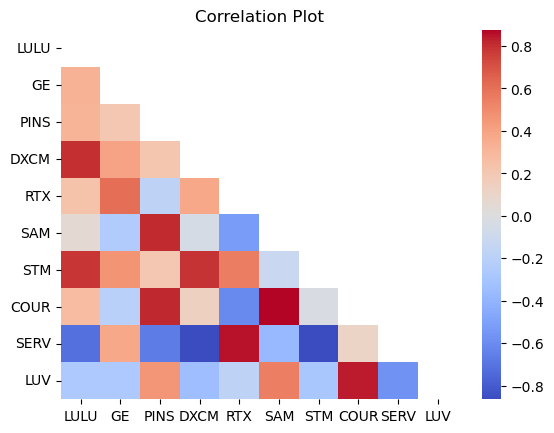

In [9]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import seaborn as sns
import matplotlib.pyplot as plt

# Initial Stocks: AAPL, AAL, BBY, AA, HD, C, S, CVX, CVS

all_data={ticker: web.DataReader(ticker,'stooq')
for ticker in ['LULU', 'GE','PINS','DXCM','RTX','SAM',
               'STM','COUR','SERV','LUV']}

price=pd.DataFrame({ticker: data['Close']
                  for ticker, data in all_data.items() })

stocks=pd.concat([price['LULU'], price['GE'], price['PINS'],price['DXCM'],
                  price['RTX'], price['SAM'], price['STM'], price['COUR'],
                  price ['SERV'],price ['LUV']],axis = 1)
mask=np.triu(np.ones_like(stocks.corr(), dtype=bool))

sns.heatmap(stocks.corr(), annot=True, fmt=".2f", annot_kws={"size": 10},
            cmap='coolwarm', mask=mask)

plt.title('Correlation Plot')
plt.show()



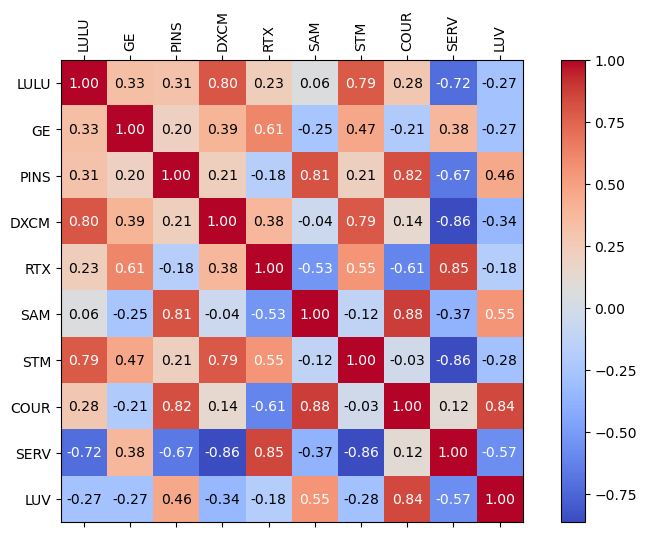

In [13]:
corr = stocks.corr()
fig, ax = plt.subplots(figsize=(10, 6))
cax = ax.matshow(corr, cmap='coolwarm')

plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

# Annotate each cell with the correlation coefficient
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}",
                 ha='center', va='center',
                 color='white' if abs(corr.iloc[i, j]) > 0.5 else 'black')

plt.colorbar(cax)
plt.show()


This correlation plot provides insights into the relationships between the different stocks you have chosen. Here’s what it indicates:

**1. Negative Correlation:**

DXCM and SERV (-0.86): There is a strong negative correlation between Dexcom (DXCM) and ServiceMaster (SERV), meaning that when DXCM's price tends to go up, SERV's price tends to go down, and vice versa.
SERV and LULU (-0.72): ServiceMaster (SERV) and Lululemon (LULU) also show a strong negative correlation, indicating that these stocks move in opposite directions.

**2.Positive Correlation:**

SERV and RTX (0.85): ServiceMaster (SERV) and Raytheon Technologies (RTX) have a high positive correlation, suggesting that their stock prices tend to move in the same direction.
COUR and SERV (0.84): Coursera (COUR) and ServiceMaster (SERV) also exhibit a strong positive correlation, meaning they generally rise and fall together.

**3.Moderate Correlation:**

PINS and SAM (0.81): Pinterest (PINS) and Boston Beer Company (SAM) show a moderate positive correlation, indicating some co-movement between their prices.
LULU and STM (0.79): Lululemon (LULU) and STMicroelectronics (STM) have a moderate positive correlation, suggesting that these stocks move somewhat together.

**4.Low to No Correlation:**

LULU and SAM (0.06): Lululemon (LULU) and Boston Beer Company (SAM) show very little correlation, indicating that their price movements are relatively independent of each other.
GE and PINS (0.20): General Electric (GE) and Pinterest (PINS) exhibit a low correlation, meaning that their stock prices do not necessarily move together.

### Implications for the Portfolio:
Diversification: **The mix of both negatively and positively correlated stocks indicates a diversified portfolio. Having negatively correlated stocks can help reduce overall portfolio risk since they can offset each other's price movements.** However, stocks with high positive correlations (like SERV and RTX) may increase the portfolio's risk, as they could move in the same direction during market events.

Risk Management: By analyzing these correlations, we can make informed decisions on how to allocate our investments to balance risk and return according to Modern Portfolio Theory. This diversified selection could be beneficial for balancing the portfolio's volatility and potential returns.

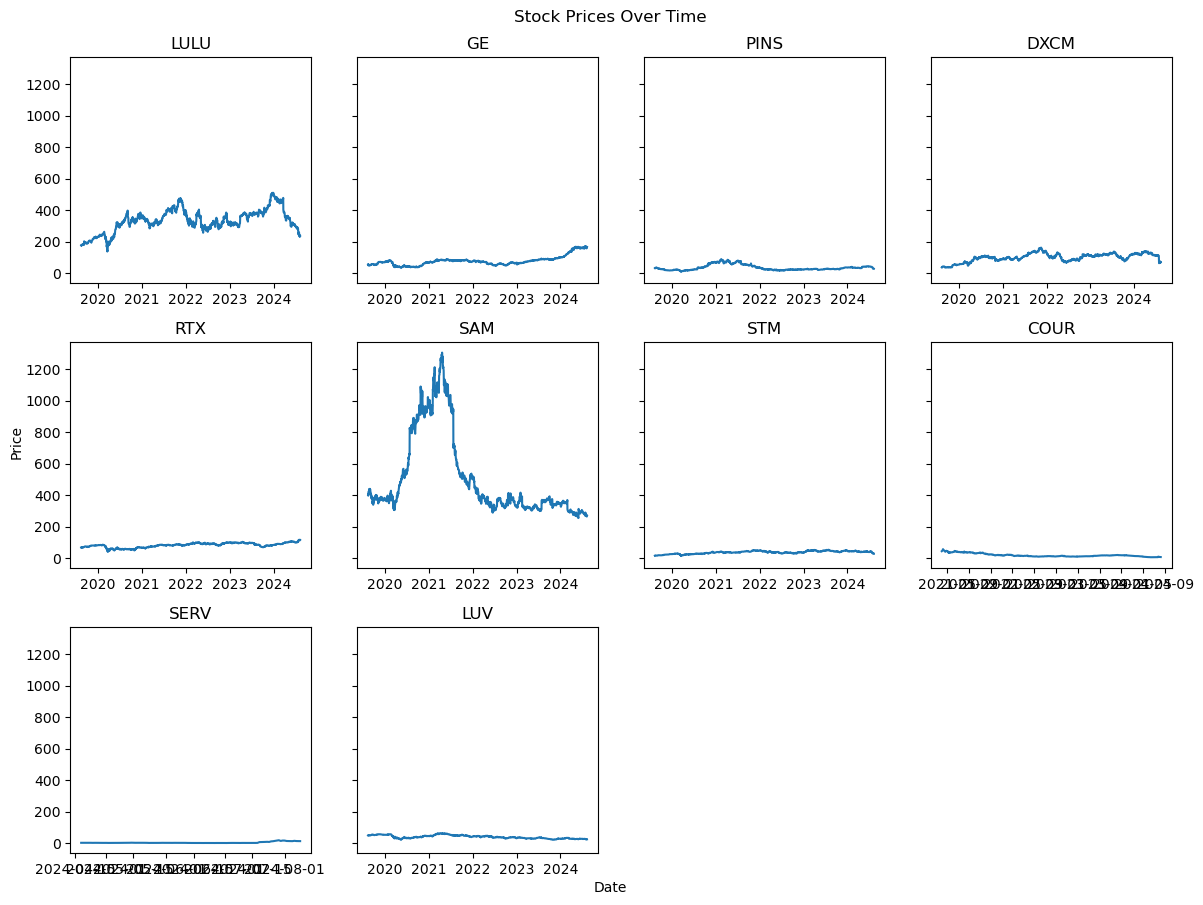

In [10]:
import matplotlib.pyplot as plt

#creates the grid
fig, axes=plt.subplots(nrows=3, ncols=4, figsize=(12,9), sharey=True)

#plots the prices on a graph for each stock
for i,stock in enumerate(all_data.keys()):
  row=i//4
  col=i%4
  axes[row,col].plot(all_data[stock].index, all_data[stock]['Close'])
  axes[row,col].set_title(stock)

#sets common axis labels and the overall title
fig.suptitle('Stock Prices Over Time')
fig.text(0.5,0,'Date', ha='center')
fig.text(0,0.5,'Price', va='center', rotation='vertical')

#fixes spacing and deletes empty plots
plt.tight_layout()
fig.delaxes(axes[2,3])
fig.delaxes(axes[2,2])

#shows the plots
plt.show()

This visualization shows the stock prices of the selected companies over time, providing a snapshot of their historical performance and volatility.

**Volatility Analysis:**

LULU (Lululemon): Exhibits significant fluctuations, indicating higher volatility with potential for higher returns, but also higher risk.

GE (General Electric), PINS (Pinterest), and DXCM (Dexcom): These stocks show relatively flat performance with minor fluctuations, suggesting they are more stable with lower volatility and potentially lower returns.
SAM (Boston Beer Company): Shows a sharp increase followed by a steep decline, indicating high volatility and significant risk.

RTX (Raytheon Technologies) and STM (STMicroelectronics): These stocks exhibit moderate volatility with some periods of growth and others of decline, indicating they are moderately volatile.

COUR (Coursera), SERV (ServiceMaster), and LUV (Southwest Airlines): These stocks display relatively stable performance, indicating lower volatility and making them suitable for risk-averse investors.

**Risk-Return Balance:**

Risk-Averse Stocks: Stocks like GE, PINS, and DXCM are relatively low-risk with steady performance, making them suitable for stabilizing the portfolio during market downturns.

Volatile Stocks: LULU and SAM provide the potential for higher returns but come with higher risk. Including these in the portfolio can increase the overall expected return, but also the portfolio's volatility.

### Conclusion:
Portfolio Strengths: **The portfolio includes a mix of both high-volatility and low-volatility stocks, which is beneficial for diversification according to Modern Portfolio Theory. This mix can help achieve a balance between risk and return, making the portfolio more resilient to market fluctuations.**

Areas for Improvement: Depending on your risk tolerance, you may want to further assess the correlation between these stocks and adjust the weights accordingly to optimize the Sharpe ratio and achieve the desired risk-return balance.
Overall, the portfolio seems well-diversified with a mix of growth and stability, but further fine-tuning based on specific investment goals could enhance its performance.

Max Sharpe Ratio =  1.9345667919905936
[0.05350506 0.16432587 0.13719239 0.01142607 0.04176556 0.06102898
 0.20212124 0.10959461 0.20822447 0.01081576]


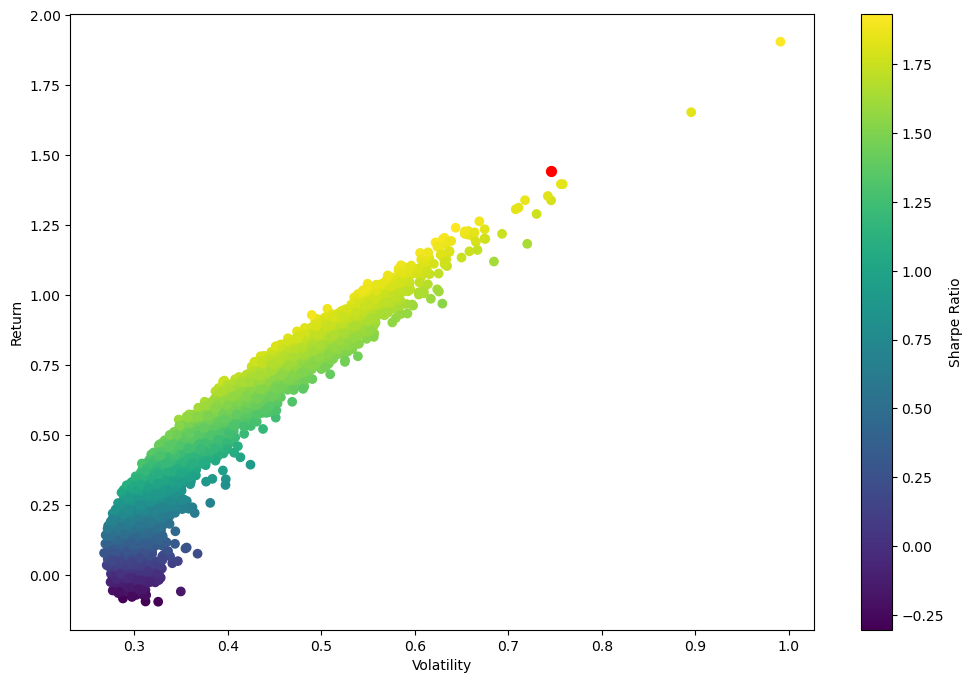

In [11]:
#MAIN CODE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas_datareader.data as web
# Stocks: AAPL, AAL, BBY, AA, HD, C, S, CVX, CVS


class Portfolio:
    def __init__(self):
      self.all_data = {ticker: web.DataReader(ticker,'stooq')
        for ticker in ['LULU', 'GE','PINS','DXCM','RTX','SAM','STM','COUR','SERV','LUV']}
      #ADJUSTED CLOSING PRICE FOR EACH STOCK
      self.price = pd.DataFrame({ticker: data['Close']
                          for ticker, data in self.all_data.items() })
      #STORES THE PRICES OF EACH TICKER INTO VARIABLE STOCKS
      self.stocks = pd.concat([self.price['LULU'], self.price['GE'],
                               self.price['PINS'],self.price['DXCM'], 
                               self.price['RTX'], self.price['SAM'], 
                               self.price['STM'], self.price['COUR'], 
                               self.price ['SERV'],self.price ['LUV']],
                              axis = 1)
      # Compute the log-returns
      self.log_ret = np.log(self.stocks/self.stocks.shift(1))

    #CALCULATIONS
    def calc(self):
      np.random.seed(42)
      num_ports = 6000
      num_stocks = 10
      all_weights = np.zeros((num_ports, len(self.stocks.columns)))
      ret_arr = np.zeros(num_ports)
      vol_arr = np.zeros(num_ports)
      sharpe_arr = np.zeros(num_ports)

      for i in range(num_ports):
          # Calculating weight of x
          weights = np.array(np.random.random(num_stocks))
          weights = weights/np.sum(weights)

          # Saving weight into all_weights
          all_weights[i,:] = weights

          # Calculating the expected return
          ret_arr[i] = np.sum((self.log_ret.mean() * weights * 252))

          # Calculating the expected volatility
          vol_arr[i] = np.sqrt(np.dot(weights.T, 
                                      np.dot(self.log_ret.cov()*252, weights)))

          # Sharpe Ratio
          sharpe_arr[i] = ret_arr[i]/vol_arr[i]

      # Print the max sharpe ratio (and it's location)
      print("Max Sharpe Ratio = ",sharpe_arr.max())
      sharpe_arr.argmax()
      max_sr_ret =  ret_arr[sharpe_arr.argmax()]
      max_sr_vol =  vol_arr[sharpe_arr.argmax()]

      #  Print the weights for stocks respectively
      print(all_weights[5451,:])

      plt.figure(figsize=(12,8))
      plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
      plt.colorbar(label='Sharpe Ratio')
      plt.xlabel('Volatility')
      plt.ylabel('Return')
      plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50) # red dot
      plt.show()

port = Portfolio()
port.calc()

**Max Sharpe Ratio:** The maximum Sharpe ratio achieved by this portfolio is approximately 1.93. The Sharpe ratio measures the risk-adjusted return, with higher values indicating better performance relative to the risk taken. A Sharpe ratio above 1 is generally considered good, while anything above 2 is considered excellent. A ratio of 1.93 indicates that the portfolio is well-balanced, providing strong returns for the level of risk involved.

Efficient Frontier Analysis:
Efficient Frontier Curve: The efficient frontier curve shows the relationship between expected return and portfolio volatility (risk). Each point represents a different combination of asset weights in the portfolio, illustrating the trade-offs between risk and return.
Red Dot (Optimal Portfolio): The red dot marks the portfolio with the highest Sharpe ratio. This portfolio represents the best trade-off between return and risk, maximizing returns for each unit of risk taken.

### Conclusion:

Optimal Risk-Return Balance: **The portfolio with the highest Sharpe ratio (1.93) suggests a well-optimized selection of assets that offers a favorable balance between risk and return.** The portfolio is efficiently diversified, minimizing unnecessary risk while enhancing potential returns.

Volatility Consideration: **The optimal portfolio is positioned with moderate volatility, indicating a balance between conservative and risky investments.** This suggests that the portfolio is designed to achieve higher returns without exposing the investor to excessive risk.

Portfolio Effectiveness: **The combination of stocks chosen for this portfolio has been effective in creating a diversified mix that reduces risk while maintaining strong returns, as reflected by the efficient frontier's shape and the high Sharpe ratio.**

**Overall Assessment:**

The portfolio is well-diversified and optimized for risk-adjusted returns. It strikes a good balance between growth and stability, making it suitable for an investor seeking both security and potential for higher returns. **The efficient construction of this portfolio is evident in its ability to offer strong returns without taking on excessive risk.**